The vast majority of data is unlabeled &rarr; lots of potential.

Dimensionality reduction is one of the most common unsupervised tasks. On this chapter, we discuss other important ones:

 * Clustering: group similar instances together into clusters.
 
 * Anomaly detection: detect what "normal" data looks like, and use it to detect abnormal instances.
 
 * Density estimation: estimating the probability density function of the process that generated the dataset

# Part 1 - Clustering

The task of identifying similar instances and assigning them into clusters.

Clustering algorithms work well with using all the features of a dataset.


<div>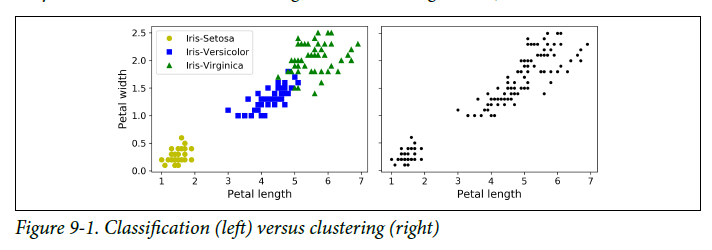</div>

### Applications

#### - Customer Segmentation

Clustering custmores based on their purchasing habits, website activity &rarr; good for recomender systems to suggest content appropriately


#### - Data Analysis

#### - Dimensionality Reduction

Once the clusters are formed, we can measure how well the instances fit into a cluster. We then substitute the vector's features with the cluster affinities: k clusters &rarr; k dimensions, usually lower than the original feature vector, but with enough preserved information.

#### - Anomaly Detection (outlier detection)
if a instance has a low fit to every cluster it is likely an anomaly

#### - Semi-supervised learning
if the dataset has few labels, use clustering and assign the same label to all the instances in the same cluster.

#### - Search engines
For instance, image search

#### - Segment an image
clustering pixels by their colors, then replacing each pixel's color with the mean color of the cluster &rarr; object detection/tracking systems &rarr; makes it easier to detect contour of objects

## K-Means

Euclidian distance between points in given dimension ($n_{features}$)$$d = \sqrt{\sum_{1}^{n}(x_{i,2}-x_{i,1})^2}$$

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

#### 1) Select the number of clusters you want to identify in your data

This is the K in K-means clusterings

#### 2) Randomly select k random data points

#### 3) Measure the distance between the 1st point and the k initial clusters

#### 4) Assign the first point to the nearest cluster

#### 5) Do the same for the next points

#### 6) Calculate the mean of each cluster

#### 7) restart the process, but now calulating the distances to the means until the cluster don't change anymore

#### 8) Assess the quality of the clustering by adding the variation within each cluster

#### repeat the process until we find the one with minimal total variance / # of repetitions is done

<div>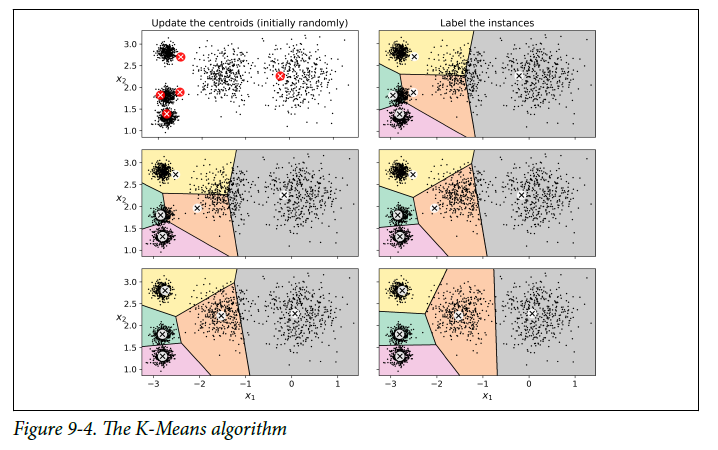<div>

### Mitigating sub-optimal centroid location

Depending on the centroids intialization, the algorithm may converge diferently from the right solution (converges to a local optimum)

<div>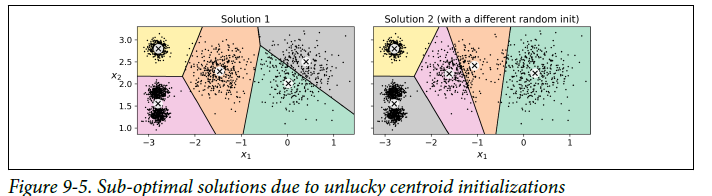<div>
    

   
  


### Centroid Iintialization Methods
  
If we happen to know where approximately the centroids should be, we can set the init hyperparameter to a np array containing the list of centroids, setting n_init to 1:

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

We can also intialize the algorithm multiple times with different random initializations and keep the best solution &rarr; n_init runs the algorithm n times and keeps the best solution.

The performance metric is the model's _inertia_ (variation)

#### K-Means +/+

Initializes with centroid distant from one another making the algorithm much less likely to converge to a sub-optimal option. K-means does this by default.

#### Accelerated K-means and Mini-batch K-means

Used to cluster datasets that do not fit in memory. Inertia performs  slightly worse thant regular k-means

<div>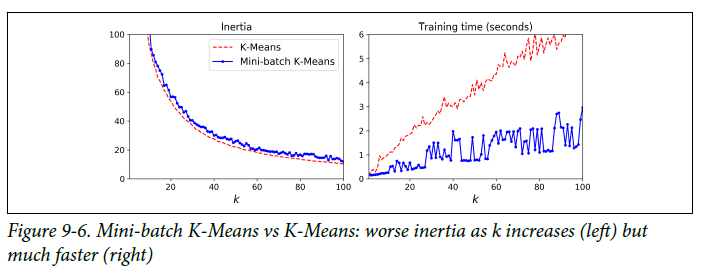<div>


In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

### Hard-Clustering x Soft clustering

Instead of assigining  each instance to a single cluster (_hard clustering_), we can just give each instance a score per cluster &rarr; _soft clustering_

In [ ]:
# get distances from every instance to every centroid
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
    [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
    [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
    [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

# so the first instance has 2.81 distance to first centroid, 
# 0.32 to the second, and so on

###  How to decide K?

clusteval library

In [ ]:
# Import library
from clusteval import clusteval

# Set parameters, as an example dbscan
ce = clusteval(method='dbscan')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(X)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(X)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

#### Elbow on the plot

Every time we increase K, we reduce the total variation &rarr; plot the variation reduction as we increase K, and see where the reduction stops being meaningful &rarr; _elbow_ in the plot

<div>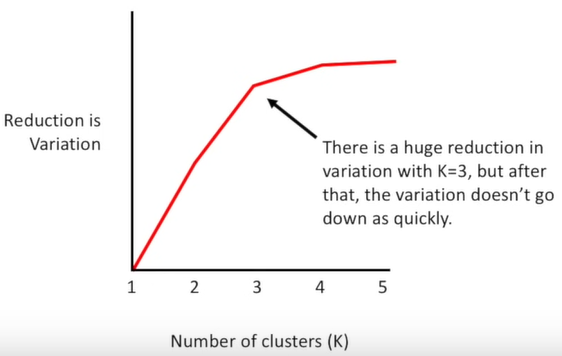</div>

<div>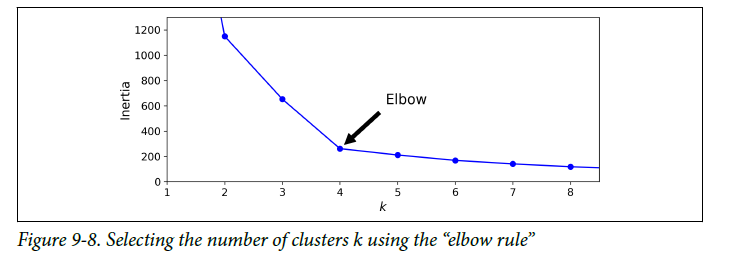</div>


#### Silhouette Score

Mean silhouette coefficient over all instances

$$instanceSilhouetteCoefficient = \frac{b-a}{max(a,b)}$$

Where _a_ is the mean distance to the instances in the same cluster (intra-cluster distance) and _b_ is the mean nearest-cluster distance (the mean distance to the instances of the next closest cluster)

The silhouettecoef varies between -1 and 1 

 * A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters
 
 * 0 means that it is close to a cluster boundary
 
 * -1 the instance may have been assigned to the wrong cluster

In [ ]:
>>> from sklearn.metrics import silhouette_score
>>> silhouette_score(X, kmeans.labels_)
0.655517642572828

<div>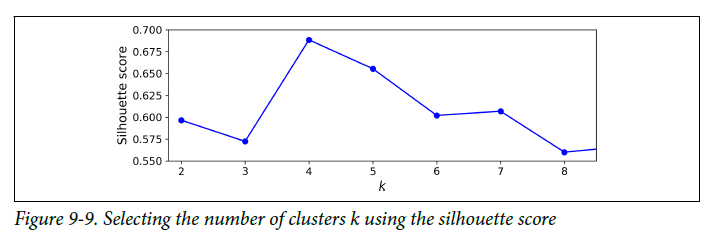</div>


From the plot we not only can see the best k-values, but also their score.

We can also plot every instance's silhouette coefficient, sorted by the cluster they are assigned to by the value of the coefficient &rarr; silhouette diagram

<div>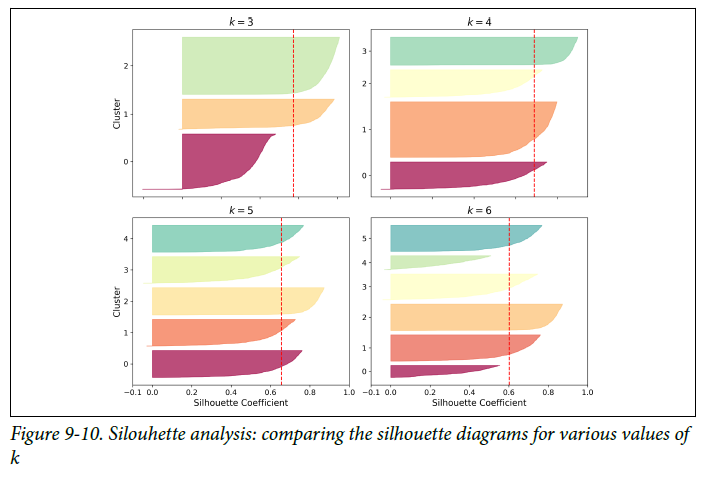</div>


The more instances have a score higher than the vertical dashed lines, the better.

### Limits of K-Means

K-means need to be run multiple times to avoid sub-optimal solutions. The number of clusters have to be specified.

It does not behave well when the clusters have varying sizes, differente densities, or non-spherical shapes. 

<div>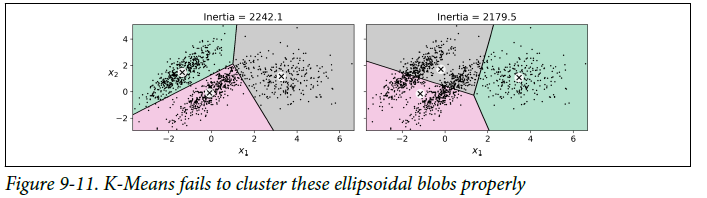</div>


Depending on the data, differente cluster algorithms may perform better.

### K-Means needs scaled features!! 

### Difference between K-means and Hierarchical Clustering

 * K-means clustering will put the data into the number of clusters we tell to


 * Hierarchical clustering tells us, pairwise, what two things are most similar.


# Semi-supervised learning

## DBSCAN

DBSCAN deals better with nested clusters than K-Means. It is algo good to identify clusters in high-dimensions.

It tries to mimic what we do by eye (_densities_ of the points)

    Clusters are in high density regions
    
    While outliers tend to be in low density regios

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

>>> dbscan.labels_
array([ 0, 2, -1, -1, 1, 0, 0, 0, ..., 3, 2, 3, 3, 4, 2, 6, 3])

## Note: -1 are the anomalies

>>> dbscan.core_sample_indices_
array([ 0, 4, 5, 6, 7, 8, 10, 11, ..., 992, 993, 995, 997, 998, 999])
>>> dbscan.components_
array([[-0.02137124, 0.40618608],
[-0.84192557, 0.53058695],
...
[-0.94355873, 0.3278936 ],
[ 0.79419406, 0.60777171]])

<div>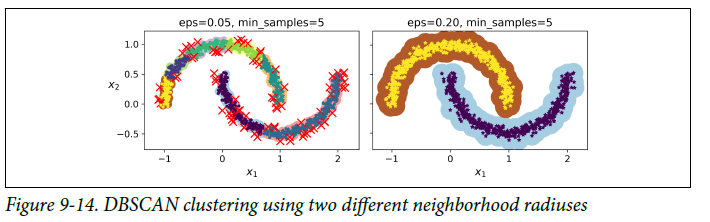</div>


DBSNCAN does not have a predict() method &rarr; it cannot predict to which cluster a new instance belongs to.

We can use a cluster algorithm on top of it to do these predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

While a robust and simple algorithm, DBSCAN can struggle if the density of the clusters varies significantly. Computation memory might be large O(m²) if $\epsilon$ is large.

#### Count the number of points close to each point

1) start with a random point, select a _radius_ $\epsilon$ and see how many points are within this radius &rarr; _$\epsilon$-neighborhood_

<div>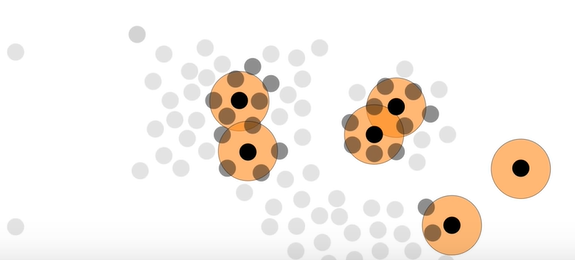</div>

We define a _Core-Point_ as a point that is close to at least n other points (we define this value), while the rest are define _Non-Core_

2) Randomly pick a Core-Point and assign it to the _first cluster_

Next, all points close to first cluster are all assigned to the first cluster. Ultimately, all Core Points close to the growing first cluster are added to it and used to extend ir further.

3) When we cannot add any more Core Points to the first cluster, we add all of the non-core points close to the core points in the first cluster.
Note: we do not extend the first cluster further. Non-core points can only joint a cluster, they do not extend it further.

4) Repeat the process to the core-points which weren't assigned to the first cluster, and so on.

5) Any remainig Non-Core points that are not close to core points in either cluster are not added to clusters and will be defined as outliers.

# Other Clustering Algorithms

   * Agglomerative clustering

   * Birch: specicif for very large datasets

   * Mean-shift

   * Affinity propagation

   * Spectral clustering

---

# Part 2 - Gaussian Mixtures

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

Gaussian Mixture Models (GMM) is a probabilist model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.

The instances generated from a single Gaussian distribution form an ellipsoid-shaped cluster (like a flattened up top gaussian distribution)

<div>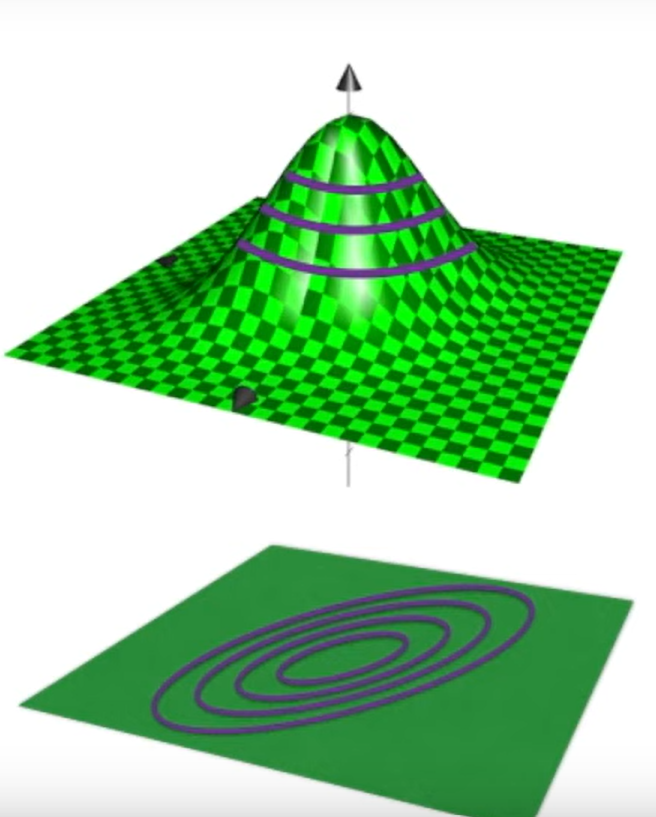</div>

Soft-clustering algorithm: the instances can belong to more than one cluster



## Main Steps

1) Colouring points according to a Gaussian

The distance between the points and the heights of the gaussian distributions

<div>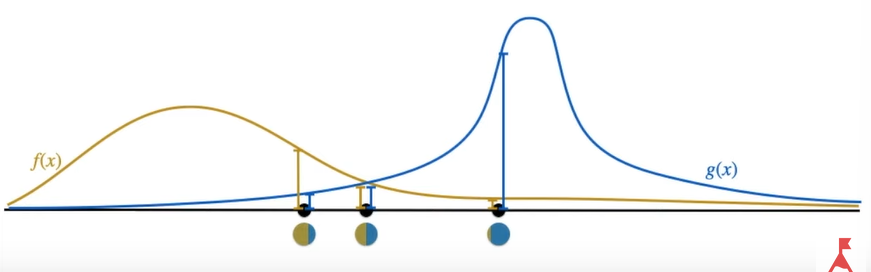</div>


2) Fitting a Gaussian 

<div>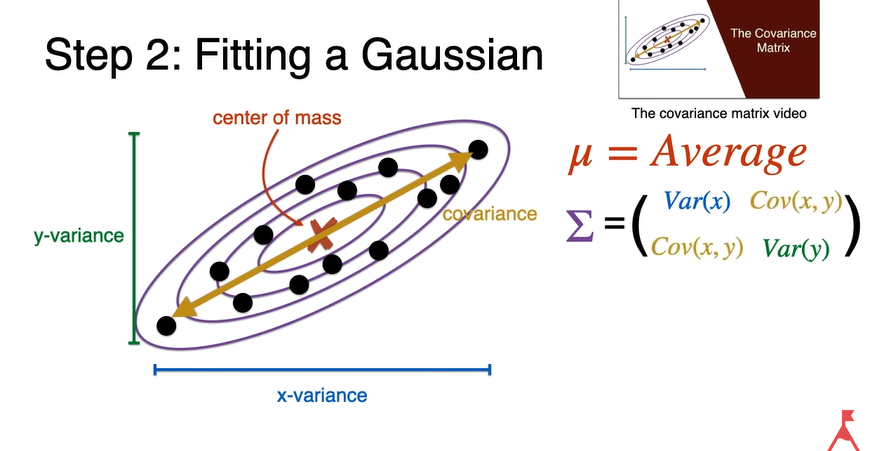</div>


## The algorithm

1) Start with random Gaussians

Start with random gaussian dsitributions: random mean, covariances, variances

<div>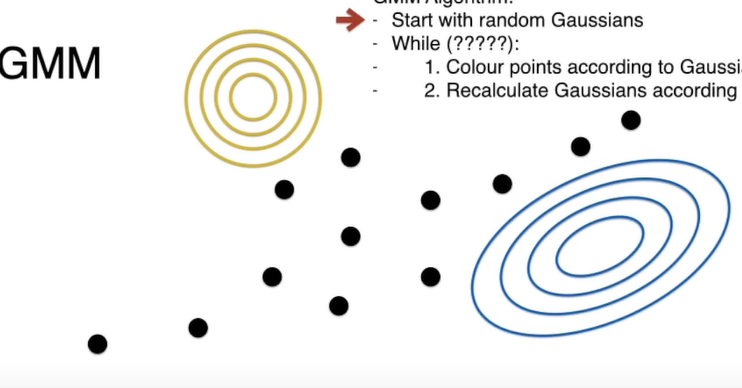</div>

2) Color points according to Gaussians

<div>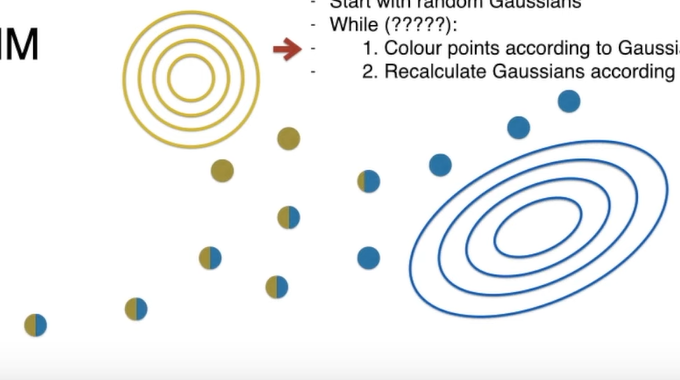</div>

3) Recalculate Gaussians according to colors
<table><tr>
<td> 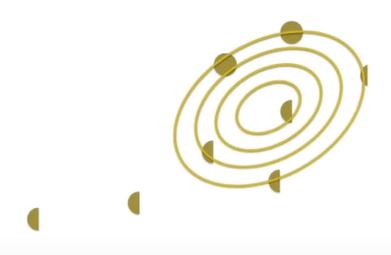 </td>
<td> 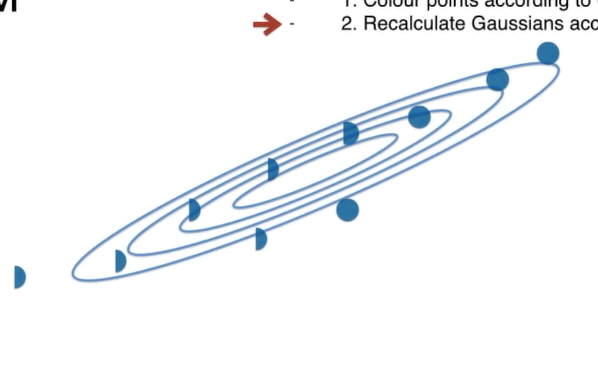 </td>
</tr></table>

<div>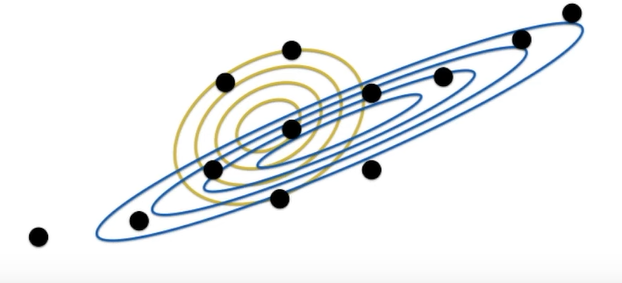</div>


4) Go back to steps 2 and 3 and repeat it until no further improvements.

2) <div>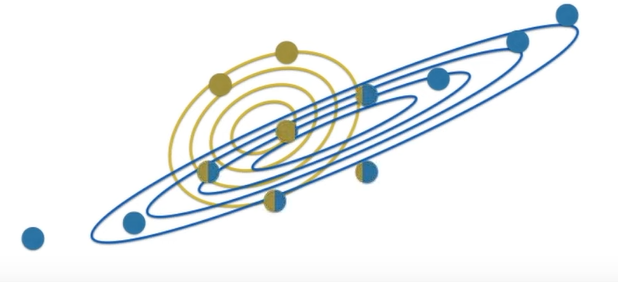</div>

3) 
<table><tr>
<td> 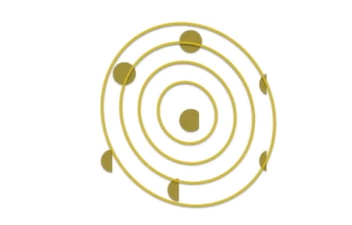 </td>
<td> 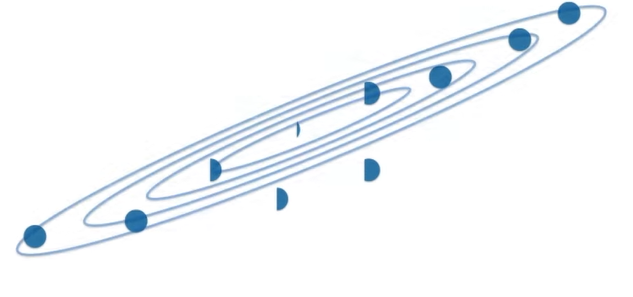 </td>
</tr></table>


<div>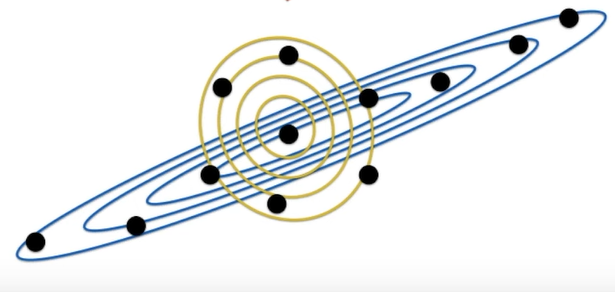</div>

## Anomaly Detection

Any instance that strongly deviates from the norm (i,e,. any instance located in a low-density region) &rarr; threshold must be defined &rarr; precision/recall tradeoff

GMMs try to fit all the data, including the outliers. So if we have many of them, this will bias the model's view of "normality" &rarr; some outliers will be considereded normal.

## Bayesian Gaussian Mixture Models

Instead of searching for an optimal number of clusters, we can use BayesianGaussianMixture class to give weights equal or close to zero to unnecessary clusters.